In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

In [2]:
df= pd.read_csv("Salary_Data.csv")

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

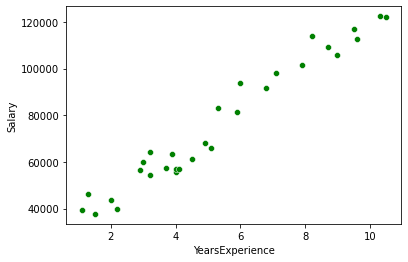

In [6]:
sns.scatterplot(x=df.YearsExperience, y=df.Salary, color="Green")

In [8]:
x= np.array(df["YearsExperience"]).reshape(-1,1)
y= np.array(df["Salary"]).reshape(-1,1)

In [16]:
x_train,x_test, y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=10)

In [17]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

24
6
24
6


In [18]:
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [19]:
pred_sal= np.round(model.predict(x_test),3)
pred_sal

array([[89715.765],
       [56031.058],
       [53223.999],
       [40124.391],
       [44802.823],
       [92522.824]])

In [20]:
model.score(x_test, y_test)

0.9816423482070253

In [21]:
model.coef_

array([[9356.86299354]])

In [22]:
model.intercept_

array([26089.09663242])

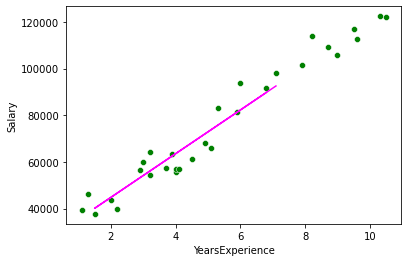

In [25]:
sns.scatterplot(x=df.YearsExperience, y=df.Salary, color="Green")
plt.plot(x_test, model.predict(x_test), color="Magenta")
plt.show()

In [26]:
from statsmodels.formula.api import ols

In [30]:
linear_model =ols("y~x", data= df).fit()

In [33]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 27 Sep 2021   Prob (F-statistic):           1.14e-20
Time:                        11:52:35   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
x           9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
df1={"test_exp":x_test[0:,0], "Act_salary":y_test[0:,0], "Predicted_salary":pred_sal[0:,0]}
df1=pd.DataFrame(df1)
df1

,test_exp,Act_salary,Predicted_salary
0,6.8,91738.0,89715.765
1,3.2,54445.0,56031.058
2,2.9,56642.0,53223.999
3,1.5,37731.0,40124.391
4,2.0,43525.0,44802.823
5,7.1,98273.0,92522.824


In [39]:
df1.to_csv("Sal_Predicted.csv")